<a href="https://colab.research.google.com/github/KESHAVNATH8/Machine-Learning-Project/blob/main/K_MeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:

df = pd.read_csv('/content/cluster.csv')
     

In [3]:
df

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031
...,...,...
1995,47,123525
1996,27,117744
1997,31,86400
1998,24,97968


In [4]:
df.head()

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031


In [5]:
df.tail()

,Age,Income
1995,47,123525
1996,27,117744
1997,31,86400
1998,24,97968
1999,25,68416


In [6]:
df.columns

Index(['Age', 'Income'], dtype='object')

In [7]:
df.describe()

,Age,Income
count,2000.000000,2000.000000
mean,35.909000,120954.419000
std,11.719402,38108.824679
min,18.000000,35832.000000
25%,27.000000,97663.250000
50%,33.000000,115548.500000
75%,42.000000,138072.250000
max,76.000000,309364.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     2000 non-null   int64
 1   Income  2000 non-null   int64
dtypes: int64(2)
memory usage: 31.4 KB


In [9]:
df.isnull().sum()

Age       0
Income    0
dtype: int64

In [12]:
df['Age']

0       67
1       22
2       49
3       45
4       53
        ..
1995    47
1996    27
1997    31
1998    24
1999    25
Name: Age, Length: 2000, dtype: int64

In [13]:
df['Income']

0       124670
1       150773
2        89210
3       171565
4       149031
         ...  
1995    123525
1996    117744
1997     86400
1998     97968
1999     68416
Name: Income, Length: 2000, dtype: int64

In [14]:
df.shape

(2000, 2)

In [15]:
AGE = df['Age'].values
INCOME = df['Income'].values

In [17]:
X = np.array(list(zip(AGE,INCOME)))

In [19]:
X

array([[    67, 124670],
       [    22, 150773],
       [    49,  89210],
       ...,
       [    31,  86400],
       [    24,  97968],
       [    25,  68416]])

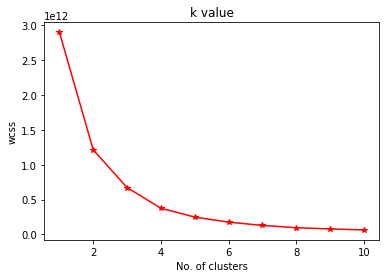

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i,random_state=0)
  km.fit(X)
  wcss.append(km.inertia_)
plt.plot(range(1,11),wcss,color="red",marker="*")
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.title("k value")
plt.show()

In [22]:
model = KMeans(n_clusters=4,random_state=0)

In [23]:
y_means = model.fit_predict(X)

In [24]:
y_means

array([3, 0, 1, ..., 1, 3, 1], dtype=int32)

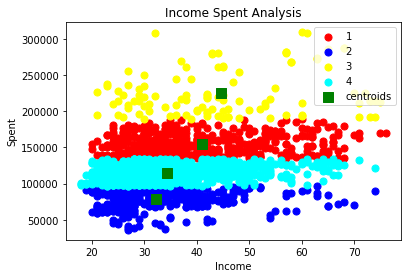

In [32]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='red',label='1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='yellow',label='3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='4')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100,marker='s', c='green',label='centroids')
plt.title("Income Spent Analysis")
plt.xlabel("Income")
plt.ylabel("Spent")
plt.legend()
plt.show()